In [3]:
import pandas as pd
df=pd.read_csv('pain_relief.csv')

In [4]:
df.head(10)

,no.stomach.upset,no.side.effect,stop.pain,work.quickly,keep.me.awake,limited.relief
0,-2.60752,-2.04092,0.66772,0.40488,1.32107,-0.35083
1,-2.59774,0.59376,-0.68969,-0.81425,-0.54921,2.94808
2,-0.60272,0.05678,-2.63519,-3.83902,-0.50832,1.52563
3,0.05149,-1.40517,-1.33480,-1.14832,-0.09143,1.52235
4,-2.59749,0.33210,-0.82528,-1.12503,2.16773,0.27801
5,1.89771,1.27329,0.95939,-1.19247,-1.48458,0.71453
6,-0.20012,-0.61518,4.15543,1.98870,0.27168,-3.55437
7,-0.97604,-2.05122,-0.13716,1.80061,-1.01667,-1.68073
8,-2.09325,-0.95388,1.86029,1.27346,3.60118,-1.88674
9,-0.09548,1.20637,-1.38364,-0.41451,0.17601,2.19475


In [5]:
df.isnull().sum()

no.stomach.upset    0
no.side.effect      0
stop.pain           0
work.quickly        0
keep.me.awake       0
limited.relief      0
dtype: int64

In [6]:
df.corr()

,no.stomach.upset,no.side.effect,stop.pain,work.quickly,keep.me.awake,limited.relief
no.stomach.upset,1.000000,0.596133,0.162376,0.088573,-0.592415,-0.169919
no.side.effect,0.596133,1.000000,0.130947,-0.067331,-0.641155,-0.064755
stop.pain,0.162376,0.130947,1.000000,0.632406,-0.027168,-0.631533
work.quickly,0.088573,-0.067331,0.632406,1.000000,0.056825,-0.610735
keep.me.awake,-0.592415,-0.641155,-0.027168,0.056825,1.000000,0.028916
limited.relief,-0.169919,-0.064755,-0.631533,-0.610735,0.028916,1.000000


In [7]:
X_df=df.iloc[:,:]
y_df=df.iloc[:,-1]
X=X_df.values
print("Type of X:", type(X))
print("Shape of X:", X.shape)


Type of X: <class 'numpy.ndarray'>
Shape of X: (100, 6)


In [8]:
from scipy.cluster.hierarchy import dendrogram, ward
import matplotlib.pyplot as plt

linkage_array = ward(X)
# Now we plot the dendrogram for the linkage_array containing the distances
# between clusters
dendrogram(linkage_array)
ax = plt.gca()
plt.xlabel("Sample index")
plt.ylabel("Cluster distance")

Text(0,0.5,'Cluster distance')

In [9]:
from sklearn.cluster import AgglomerativeClustering
agg = AgglomerativeClustering(n_clusters=3)
agg.fit(X)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
            connectivity=None, linkage='ward', memory=None, n_clusters=3,
            pooling_func=<function mean at 0x7f161c580620>)

In [10]:
label_X=agg.labels_
print(label_X) # 1로 5개, 0으로 5개, 0으로 5개

[2 0 0 0 0 1 1 2 2 0 2 2 0 1 1 2 2 1 0 0 0 2 1 1 2 0 1 0 2 0 1 1 0 1 2 2 0
 2 0 0 0 0 1 1 1 1 1 2 0 1 0 2 0 0 0 0 0 1 0 0 1 1 1 2 0 0 2 2 1 2 1 0 1 2
 0 2 2 0 1 0 0 0 0 0 2 1 1 0 0 1 0 1 1 1 2 0 1 2 0 0]


In [11]:
df['label']=label_X
df.head(10)

,no.stomach.upset,no.side.effect,stop.pain,work.quickly,keep.me.awake,limited.relief,label
0,-2.60752,-2.04092,0.66772,0.40488,1.32107,-0.35083,2
1,-2.59774,0.59376,-0.68969,-0.81425,-0.54921,2.94808,0
2,-0.60272,0.05678,-2.63519,-3.83902,-0.50832,1.52563,0
3,0.05149,-1.40517,-1.33480,-1.14832,-0.09143,1.52235,0
4,-2.59749,0.33210,-0.82528,-1.12503,2.16773,0.27801,0
5,1.89771,1.27329,0.95939,-1.19247,-1.48458,0.71453,1
6,-0.20012,-0.61518,4.15543,1.98870,0.27168,-3.55437,1
7,-0.97604,-2.05122,-0.13716,1.80061,-1.01667,-1.68073,2
8,-2.09325,-0.95388,1.86029,1.27346,3.60118,-1.88674,2
9,-0.09548,1.20637,-1.38364,-0.41451,0.17601,2.19475,0


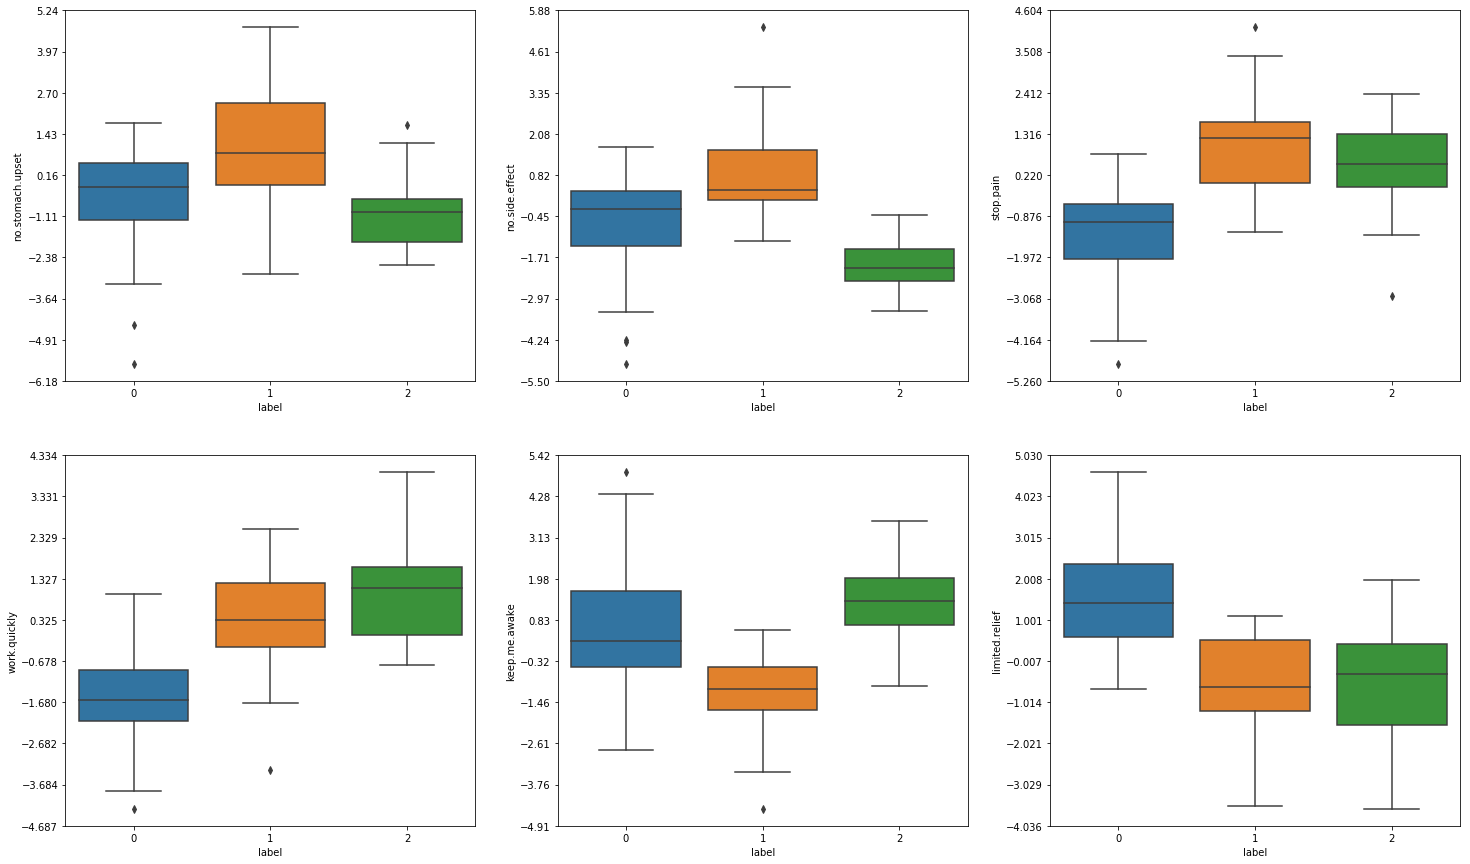

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

fig, axes = plt.subplots(2, 3, figsize=(25, 15),
                         subplot_kw={'xticks': (), 'yticks': ()})

sns.boxplot(x="label", y="no.stomach.upset", ax=axes[0,0],data=df)
# axes[0,0].tick_params(axis='x', colors='white')
# axes[0,0].tick_params(axis='y', colors='white')
# axes[0,0].xaxis.label.set_color('white')
# axes[0,0].yaxis.label.set_color('white')
axes[0,0].set_yticks(np.linspace(axes[0,0].get_ylim()[0],axes[0,0].get_ylim()[1],10))

sns.boxplot(x="label", y="no.side.effect", ax=axes[0,1],data=df)
# axes[0,1].tick_params(axis='x', colors='white')
# axes[0,1].tick_params(axis='y', colors='white')
# axes[0,1].xaxis.label.set_color('white')
# axes[0,1].yaxis.label.set_color('white')
axes[0,1].set_yticks(np.linspace(axes[0,1].get_ylim()[0],axes[0,1].get_ylim()[1],10))

sns.boxplot(x="label", y="stop.pain", ax=axes[0,2],data=df)
# axes[0,2].tick_params(axis='x', colors='white')
# axes[0,2].tick_params(axis='y', colors='white')
# axes[0,2].xaxis.label.set_color('white')
# axes[0,2].yaxis.label.set_color('white')
axes[0,2].set_yticks(np.linspace(axes[0,2].get_ylim()[0],axes[0,2].get_ylim()[1],10))

sns.boxplot(x="label", y="work.quickly", ax=axes[1,0],data=df)
# axes[1,0].tick_params(axis='x', colors='white')
# axes[1,0].tick_params(axis='y', colors='white')
# axes[1,0].xaxis.label.set_color('white')
# axes[1,0].yaxis.label.set_color('white')
axes[1,0].set_yticks(np.linspace(axes[1,0].get_ylim()[0],axes[1,0].get_ylim()[1],10))

sns.boxplot(x="label", y="keep.me.awake", ax=axes[1,1],data=df)
# axes[1,1].tick_params(axis='x', colors='white')
# axes[1,1].tick_params(axis='y', colors='white')
# axes[1,1].xaxis.label.set_color('white')
# axes[1,1].yaxis.label.set_color('white')
axes[1,1].set_yticks(np.linspace(axes[1,1].get_ylim()[0],axes[1,1].get_ylim()[1],10))

sns.boxplot(x="label", y="limited.relief", ax=axes[1,2],data=df)
# axes[1,2].tick_params(axis='x', colors='white')
# axes[1,2].tick_params(axis='y', colors='white')
# axes[1,2].xaxis.label.set_color('white')
# axes[1,2].yaxis.label.set_color('white')
axes[1,2].set_yticks(np.linspace(axes[1,2].get_ylim()[0],axes[1,2].get_ylim()[1],10))
plt.rcParams["axes.labelweight"] = "bold"
plt.show()


In [13]:
df0=df[df['label']==0]
stats0 = df0.describe()
df1=df[df['label']==1]
stats1 = df1.describe()
df2=df[df['label']==2]
stats2 = df2.describe()

display(stats0)
display(stats1)
display(stats2)

,no.stomach.upset,no.side.effect,stop.pain,work.quickly,keep.me.awake,limited.relief,label
count,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.0
mean,-0.563318,-0.630906,-1.341307,-1.554163,0.559401,1.482255,0.0
std,1.553487,1.509370,1.226414,1.141002,1.539175,1.240165,0.0
min,-5.664180,-4.985430,-4.811910,-4.276560,-2.800260,-0.687430,0.0
25%,-1.219070,-1.345475,-2.018595,-2.136155,-0.488405,0.591185,0.0
50%,-0.218050,-0.225010,-1.039800,-1.623280,0.241060,1.411240,0.0
75%,0.543165,0.326460,-0.543485,-0.885870,1.649915,2.355815,0.0
max,1.768600,1.673620,0.776930,0.943090,4.953720,4.618060,0.0


,no.stomach.upset,no.side.effect,stop.pain,work.quickly,keep.me.awake,limited.relief,label
count,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.0
mean,0.996268,0.937843,1.053203,0.294138,-1.250649,-0.611317,1.0
std,1.735892,1.425683,1.354294,1.281223,1.154091,1.270386,0.0
min,-2.890390,-1.205160,-1.288670,-3.327720,-4.438010,-3.554370,1.0
25%,-0.147120,0.056255,0.013963,-0.340640,-1.690760,-1.234115,1.0
50%,0.849910,0.352670,1.196985,0.313450,-1.085940,-0.645040,1.0
75%,2.384075,1.588902,1.646185,1.213492,-0.475070,0.505618,1.0
max,4.721270,5.358390,4.155430,2.526910,0.537000,1.095340,1.0


,no.stomach.upset,no.side.effect,stop.pain,work.quickly,keep.me.awake,limited.relief,label
count,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.0
mean,-1.018938,-1.925588,0.528394,0.955242,1.340083,-0.599470,2.0
std,1.065346,0.714285,1.251095,1.126654,1.205627,1.368831,0.0
min,-2.607520,-3.352060,-2.987580,-0.783450,-1.016670,-3.623990,2.0
25%,-1.900540,-2.444960,-0.088300,-0.037660,0.681130,-1.568150,2.0
50%,-0.976040,-2.040920,0.528570,1.093580,1.357070,-0.324810,2.0
75%,-0.575820,-1.454840,1.307910,1.601710,2.011510,0.409930,2.0
max,1.716540,-0.393870,2.389000,3.923600,3.601180,1.973840,2.0


In [14]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
print(kmeans.predict(X)) #0으로 5개

[2 1 1 1 2 0 0 2 2 1 2 0 2 0 0 2 2 0 1 2 2 1 0 0 2 2 0 1 2 1 0 0 1 1 2 2 1
 2 1 1 2 1 0 0 0 1 0 2 1 0 1 2 1 1 1 1 1 0 1 2 0 0 0 2 1 2 2 2 0 2 0 1 0 2
 1 2 0 1 0 2 1 1 1 1 2 0 0 1 1 0 1 0 0 0 2 2 0 2 1 1]


In [15]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X_scaled=scaler.transform(X)

pca=PCA(n_components=None)
pca.fit(X_scaled)
X_pca=pca.transform(X_scaled)

pca_df = pd.DataFrame(data = X_pca)
display(pca_df.head(10))
print(pca.explained_variance_ratio_)
print(sum(pca.explained_variance_ratio_[:2]))

,0,1,2,3,4,5
0,0.649660,-1.762752,-0.410712,0.426808,-0.274137,0.091380
1,1.214830,0.815284,-1.085300,1.340062,0.471999,-0.327408
2,1.712757,2.018175,-0.392714,-0.432077,-0.810055,0.163981
3,0.960525,0.635135,0.550565,0.119873,0.038654,0.293820
4,1.236562,-0.495549,-1.151115,-0.348227,-0.213909,-0.898942
5,-1.232691,1.458368,-0.274010,-0.232518,0.405020,0.571644
6,-2.693832,-2.484220,-0.605742,-0.182458,-0.353419,0.559818
7,-0.724931,-1.276611,0.801746,0.974705,-1.056470,-0.044133
8,-0.193264,-2.846175,-0.813790,-0.716667,0.147445,-0.626705
9,0.486402,1.169865,-0.170953,0.282942,0.694557,-0.842756


[0.40512407 0.34497508 0.07318967 0.0644951  0.06339666 0.04881942]
0.7500991416000542


In [16]:
pca2=PCA(n_components=2)
pca2.fit(X_scaled)
X_pca2=pca2.transform(X_scaled)
temp_df = pd.DataFrame(data = X_pca2, columns = ['principal component 1', 'principal component 2'])
pca2_df = pd.concat([temp_df, df[['label']]], axis = 1)
display(pca2_df.head(10))



,principal component 1,principal component 2,label
0,0.649660,-1.762752,2
1,1.214830,0.815284,0
2,1.712757,2.018175,0
3,0.960525,0.635135,0
4,1.236562,-0.495549,0
5,-1.232691,1.458368,1
6,-2.693832,-2.484220,1
7,-0.724931,-1.276611,2
8,-0.193264,-2.846175,2
9,0.486402,1.169865,0


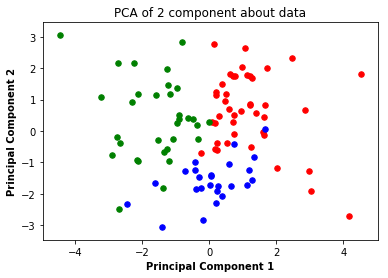

In [17]:
targets = [0, 1, 2]
colors = ['red', 'green', 'blue']
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of 2 component about data')

for target, color in zip(targets,colors):
    index = pca2_df['label'] == target
    for i in range(len(pca2_df.loc[index, 'principal component 1'].values)):
        plt.scatter(pca2_df.loc[index, 'principal component 1'].values[i], 
                 pca2_df.loc[index, 'principal component 2'].values[i],
                 color = color,s = 30)

plt.show()